# prediction with own data

https://drawdata.xyz/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv("data/test1_training_data.csv") 
df.head()

,x,y,z
0,164.759682,403.234800,a
1,175.737883,353.097387,a
2,227.094609,363.193679,a
3,230.403411,356.752026,a
4,157.782700,359.771016,a


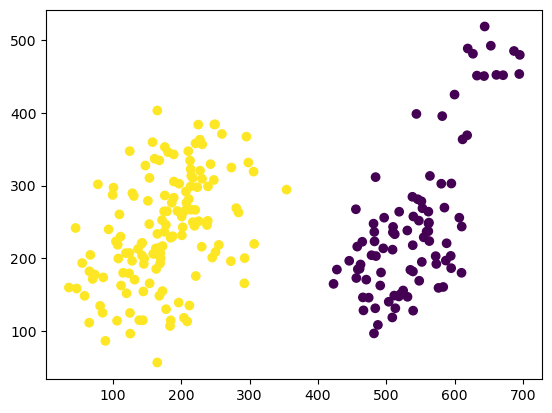

In [3]:
X = df[['x', 'y']].values # for the model, we wouldn't need values, its just for the scatter plot
y = df['z'] == 'a' # same goes for == 'a'
plt.scatter(X[:,0], X[:, 1], c=y) # to get an understanding of the data

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

pipe.fit(X,y) #train the model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [5]:
new_data = pd.read_csv("data/test1_predict_data.csv") # get the data we want to predict
X_new = new_data[['x', 'y']]


In [6]:
y_pred = pipe.predict(X_new) # use the model

/Users/lukasbossert/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


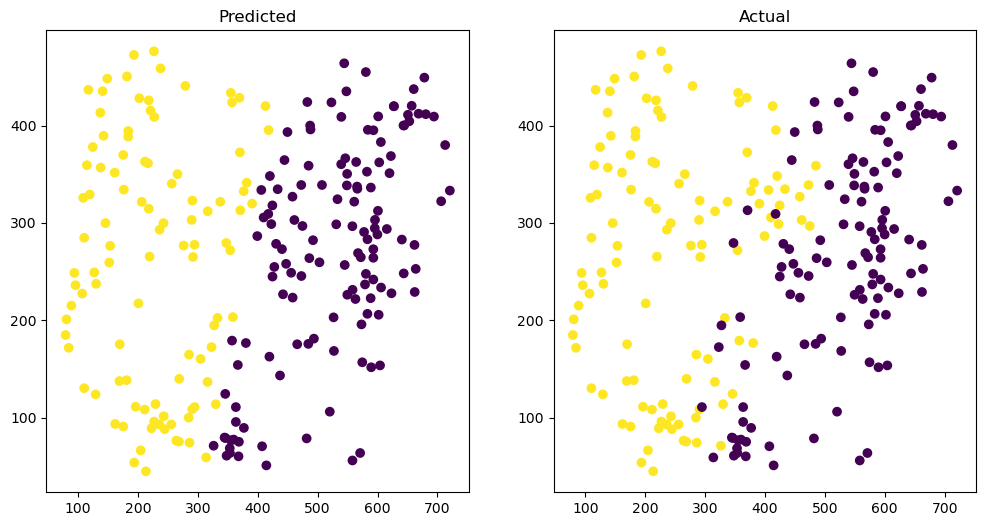

In [7]:
df_actual = pd.read_csv("data/test1_predict_data.csv")
df.head()
X_plot = df_actual[['x', 'y']].values 
y_plot = df_actual['z'] == 'a' 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(X_new['x'], X_new['y'], c=y_pred)
ax1.set_title('Predicted')

ax2.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot)
ax2.set_title('Actual')

plt.show()
